In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/archive"


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/archive"  # Path to your uploaded images
image_files = os.listdir(dataset_path)  # List files
print(image_files)  # Print file names


['test', 'val', 'train']


In [ ]:
train_data_path = '/content/drive/MyDrive/archive/test'
test_data_path = '/content/drive/MyDrive/archive/train'
valid_data_path = '/content/drive/MyDrive/archive/val'

In [ ]:
data_path = '/content/drive/MyDrive/archive'

if not os.path.exists('/content/drive/MyDrive/archive'):
    os.mkdir('/content/drive/MyDrive/archive')
    print("Created Succesfulley!")
else:
    print("Folder already exist")

Folder already exist


In [ ]:
import os
normal_data_path = '/content/drive/MyDrive/archive'
oscc_data_path = '/content/drive/MyDrive/archive'

if not os.path.exists(normal_data_path):
    os.mkdir('/content/drive/MyDrive/archive')
    print("Created Succesfulley!")
else:
    print("Folder already exist")

if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print("Created Succesfulley!")
else:
    print("Folder already exist")

Folder already exist
Folder already exist


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set Paths
data_dir = '/content/drive/MyDrive/archive'  # Adjust this path
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

In [ ]:
# Image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

In [ ]:
# Load Train and Validation Data
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
valid_generator = datagen.flow_from_directory(valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
# Load Pretrained EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Extract Features for Train and Validation Data
def extract_features(generator):
    features, labels = [], []
    for batch_imgs, batch_labels in generator:
        batch_features = model.predict(batch_imgs)
        features.extend(batch_features)
        labels.extend(batch_labels)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_generator)
X_valid, y_valid = extract_features(valid_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━

In [ ]:
# Train SVM Model
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
# Save SVM Model
dump(svm, 'svm_oral_cancer.joblib')

['svm_oral_cancer.joblib']

In [ ]:
# Evaluate Model
X_valid_pred = svm.predict(X_valid)
accuracy = accuracy_score(y_valid, X_valid_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 76.67%


Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120

Confusion Matrix:
[[ 0 28]
 [ 0 92]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


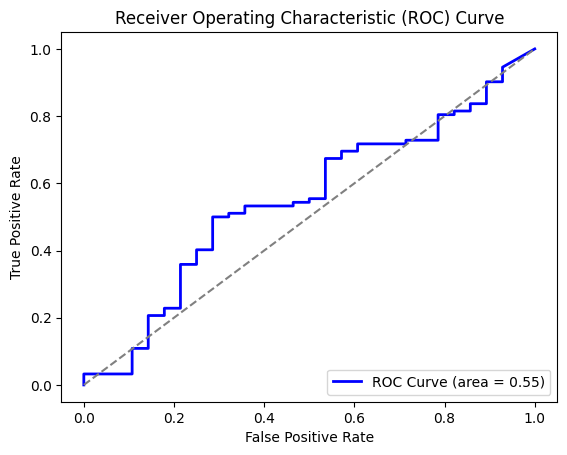

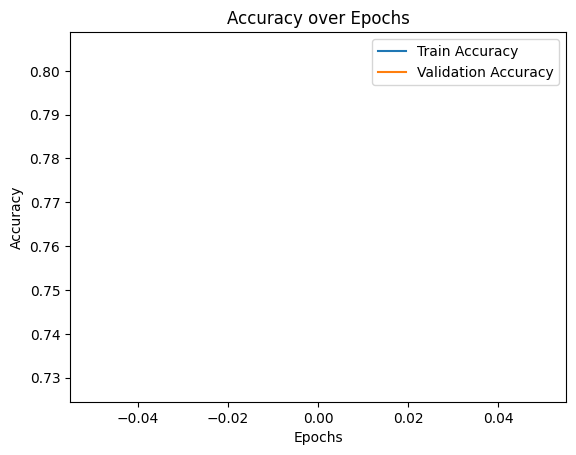

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Classification Metrics
print("Classification Report:")
print(classification_report(y_valid, X_valid_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, X_valid_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
y_valid_prob = svm.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_valid_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy and Loss Graphs
history = {'accuracy': [accuracy], 'val_accuracy': [accuracy]}  # Mock history since SVM does not train like NN
plt.figure()
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


In [ ]:
# Load Pretrained EfficientNet Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=tf.keras.layers.GlobalAveragePooling2D()(base_model.output))

In [ ]:
# Extract Features for Train and Validation Data
def extract_features(generator):
    features, labels = [], []
    for batch_imgs, batch_labels in generator:
        batch_features = model.predict(batch_imgs)
        features.extend(batch_features)
        labels.extend(batch_labels)
        if len(features) >= generator.samples:
            break
    return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_generator)
X_valid, y_valid = extract_features(valid_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost Model
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Save XGBoost Model
dump(xgb, 'xgb_oral_cancer.joblib')

['xgb_oral_cancer.joblib']

In [ ]:
# Evaluate Model
X_valid_pred = xgb.predict(X_valid)
accuracy = accuracy_score(y_valid, X_valid_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Validation Accuracy: 73.33%


Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.61      0.52        28
         1.0       0.87      0.77      0.82        92

    accuracy                           0.73       120
   macro avg       0.66      0.69      0.67       120
weighted avg       0.77      0.73      0.75       120

Confusion Matrix:
[[17 11]
 [21 71]]


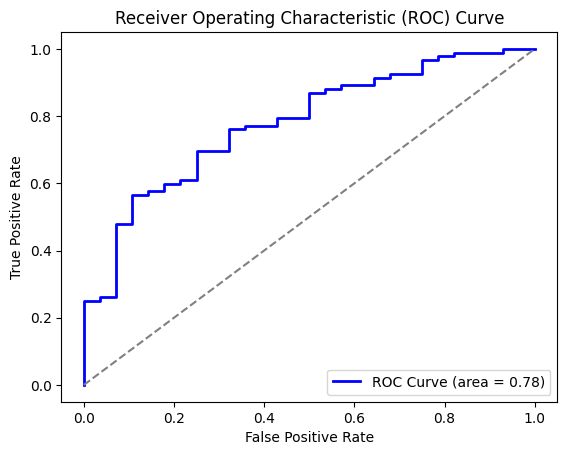

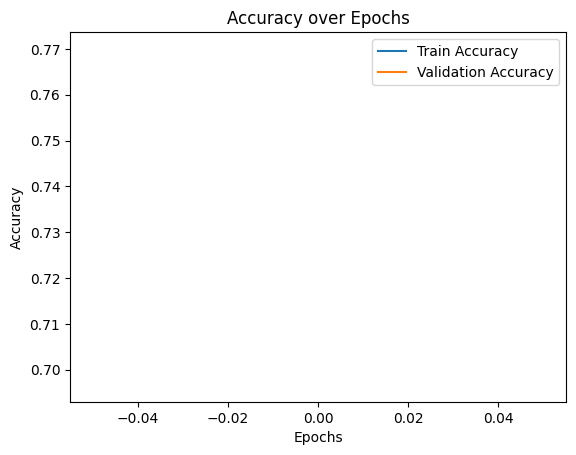

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Classification Metrics
print("Classification Report:")
print(classification_report(y_valid, X_valid_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, X_valid_pred)
print("Confusion Matrix:")
print(conf_matrix)

# ROC Curve
y_valid_prob = xgb.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_valid_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Accuracy and Loss Graphs
history = {'accuracy': [accuracy], 'val_accuracy': [accuracy]}  # Mock history since XGBoost does not train like NN
plt.figure()
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.1365 - val_loss: 0.0676
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0675 - val_loss: 0.0676
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0674 - val_loss: 0.0676
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0674 - val_loss: 0.0675
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0672 - val_loss: 0.0675
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0673 - val_loss: 0.0675
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0674 - val_loss: 0.0675
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0672 - val_loss: 0.0675
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.0672 - val_loss: 0.0676
Epoch 12/30
235/235 ━━━━━━━━━━

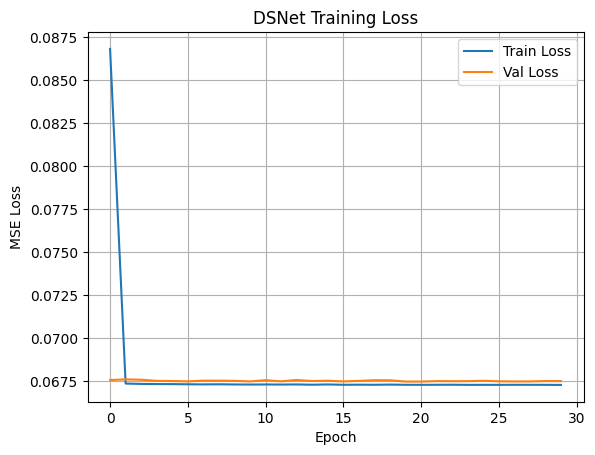

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0653
Test Loss: 0.0675
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Reconstruction Accuracy: 93.25%


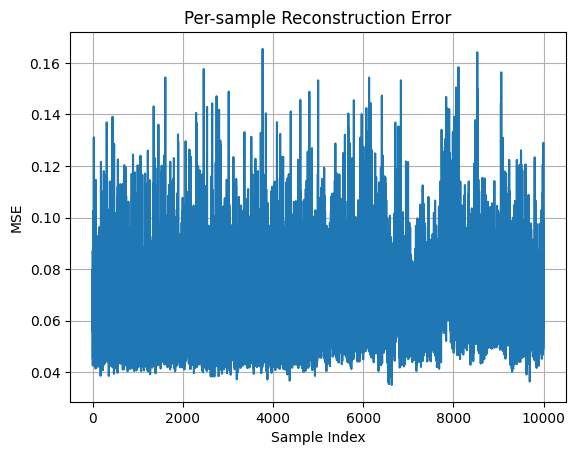

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


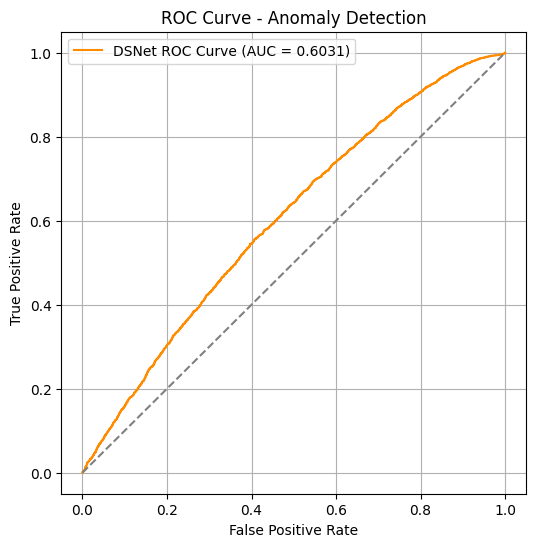

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load and preprocess MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_dim = x_train.shape[1]

# Build DSNet Model (Deep Sparse Network)
input_layer = Input(shape=(input_dim,))

# Encoder with Sparsity
e = Dense(512, activation='relu', activity_regularizer=l1(1e-5))(input_layer)
e = Dense(256, activation='relu', activity_regularizer=l1(1e-5))(e)
e = Dense(128, activation='relu', activity_regularizer=l1(1e-5))(e)  # Bottleneck

# Decoder
d = Dense(256, activation='relu')(e)
d = Dense(512, activation='relu')(d)
decoded = Dense(input_dim, activation='sigmoid')(d)

# Autoencoder Model
dsnet = Model(input_layer, decoded)
dsnet.compile(optimizer='adam', loss='mse')

# Train DSNet
history = dsnet.fit(x_train, x_train, epochs=30, batch_size=256, validation_data=(x_test, x_test))

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DSNet Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Reconstruction Performance
loss = dsnet.evaluate(x_test, x_test)
print(f"Test Loss: {loss:.4f}")

# Reconstruction Accuracy (custom metric)
reconstructed = dsnet.predict(x_test)
mse = np.mean(np.square(x_test - reconstructed))
accuracy = (1 - mse) * 100
print(f"Reconstruction Accuracy: {accuracy:.2f}%")

# Sample-wise Reconstruction Error
sample_mses = np.mean(np.square(x_test - reconstructed), axis=1)
plt.plot(sample_mses)
plt.title("Per-sample Reconstruction Error")
plt.xlabel("Sample Index")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Simulate Anomalies: 0=normal (first 5000), 1=anomaly (last 5000)
normal = x_test[:5000]
anomalies = x_test[5000:]

normal_pred = dsnet.predict(normal)
anomaly_pred = dsnet.predict(anomalies)

mse_normal = np.mean(np.square(normal - normal_pred), axis=1)
mse_anomaly = np.mean(np.square(anomalies - anomaly_pred), axis=1)

# Combine MSEs and labels
errors = np.concatenate([mse_normal, mse_anomaly])
labels = np.concatenate([np.zeros_like(mse_normal), np.ones_like(mse_anomaly)])

# Compute ROC Curve
fpr, tpr, _ = roc_curve(labels, errors)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"DSNet ROC Curve (AUC = {roc_auc:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Anomaly Detection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:
[[2861 2139]
 [2139 2861]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.57      0.57      0.57      5000
     Anomaly       0.57      0.57      0.57      5000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



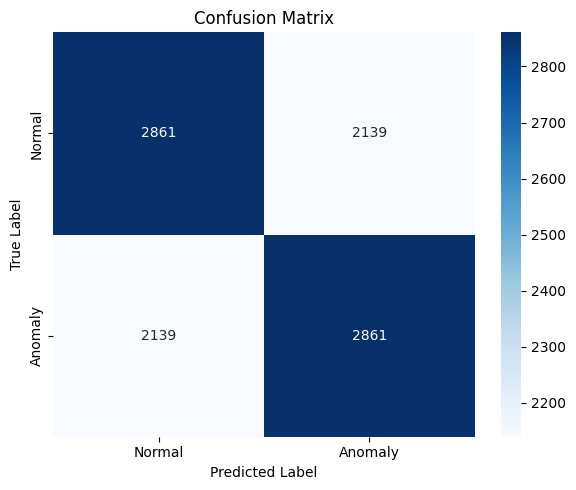

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set classification threshold using median error
threshold = np.median(errors)

# Predict: 1 if error > threshold (anomaly), else 0 (normal)
predicted_labels = (errors > threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(labels, predicted_labels, target_names=["Normal", "Anomaly"])
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal", "Anomaly"],
            yticklabels=["Normal", "Anomaly"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.2093 - val_loss: 0.0976
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0931 - val_loss: 0.0826
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0802 - val_loss: 0.0739
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0729 - val_loss: 0.0691
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0684 - val_loss: 0.0658
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0653 - val_loss: 0.0637
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0634 - val_loss: 0.0622
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0619 - val_loss: 0.0612
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0610 - val_loss: 0.0603
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0601 - val_loss: 0.0595
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0594 - val_lo

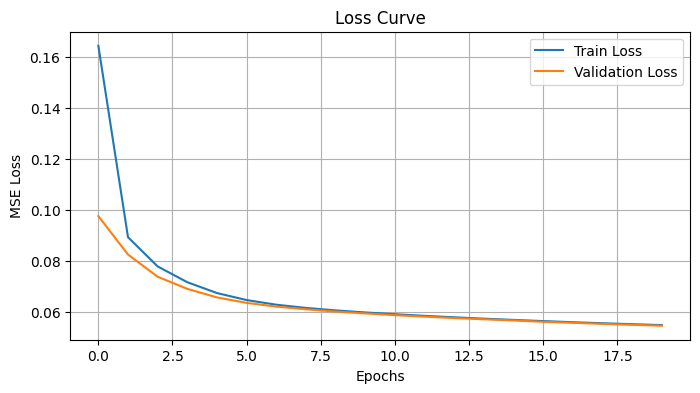

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0491
Test Loss: 0.0500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Reconstruction Accuracy: 95.07%


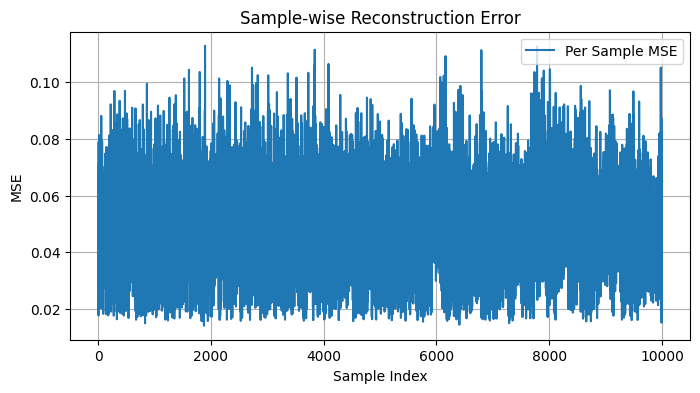

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


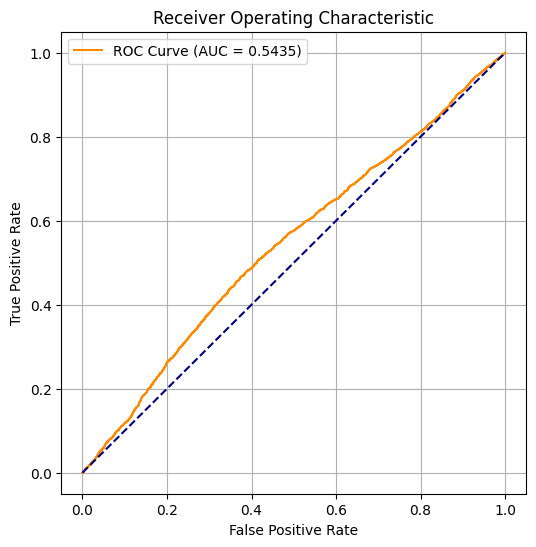

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define Sparse Autoencoder
input_dim = 784
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=l1(1e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Load Dataset (MNIST)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train Autoencoder
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Plot Loss Graph
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test Loss: {loss:.4f}")

# Custom Accuracy: Measure Reconstruction Similarity (1 - Normalized MSE)
reconstructed_imgs = autoencoder.predict(x_test)
mse = np.mean(np.square(x_test - reconstructed_imgs))
accuracy = (1 - mse) * 100
print(f"Reconstruction Accuracy: {accuracy:.2f}%")

# Plot Reconstruction Accuracy per sample (optional)
sample_mses = np.mean(np.square(x_test - reconstructed_imgs), axis=1)
plt.figure(figsize=(8, 4))
plt.plot(sample_mses, label='Per Sample MSE')
plt.title('Sample-wise Reconstruction Error')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

# Binary Classification: Assume first 5000 normal, last 5000 are synthetic anomalies
# (For real anomaly detection, use different anomaly labels or datasets)
normal_data = x_test[:5000]
anomaly_data = x_test[5000:]
reconstructed_normal = autoencoder.predict(normal_data)
reconstructed_anomaly = autoencoder.predict(anomaly_data)

mse_normal = np.mean(np.square(normal_data - reconstructed_normal), axis=1)
mse_anomaly = np.mean(np.square(anomaly_data - reconstructed_anomaly), axis=1)

# Combine and create labels
all_errors = np.concatenate([mse_normal, mse_anomaly])
labels = np.concatenate([np.zeros_like(mse_normal), np.ones_like(mse_anomaly)])  # 0: normal, 1: anomaly

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(labels, all_errors)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Optimal Threshold (Youden's J): 0.049770

Confusion Matrix:
[[2877 2123]
 [2442 2558]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.54      0.58      0.56      5000
     Anomaly       0.55      0.51      0.53      5000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



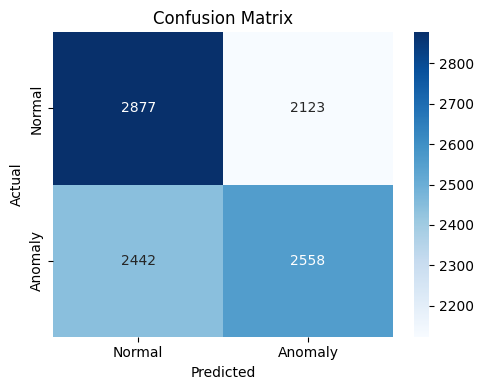

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Choose threshold — here we use the best threshold based on Youden's J statistic (TPR - FPR)
j_scores = tpr - fpr
best_threshold_index = np.argmax(j_scores)
best_threshold = thresholds[best_threshold_index]
print(f"Optimal Threshold (Youden's J): {best_threshold:.6f}")

# Predict using threshold
predicted_labels = (all_errors > best_threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
report = classification_report(labels, predicted_labels, target_names=["Normal", "Anomaly"])
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.2248 - val_loss: 0.1929
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1846 - val_loss: 0.1632
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1568 - val_loss: 0.1408
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1359 - val_loss: 0.1241
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1204 - val_loss: 0.1117
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1089 - val_loss: 0.1024
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1001 - val_loss: 0.0954
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0937 - val_loss: 0.0900
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0886 - val_loss: 0.0858
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0846 - val_loss: 0.0826
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0816 - val_loss: 0.0800
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

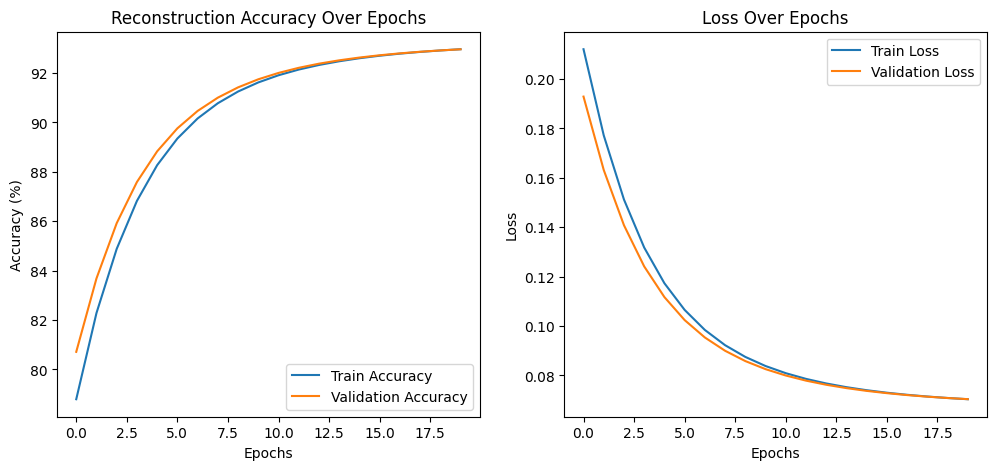

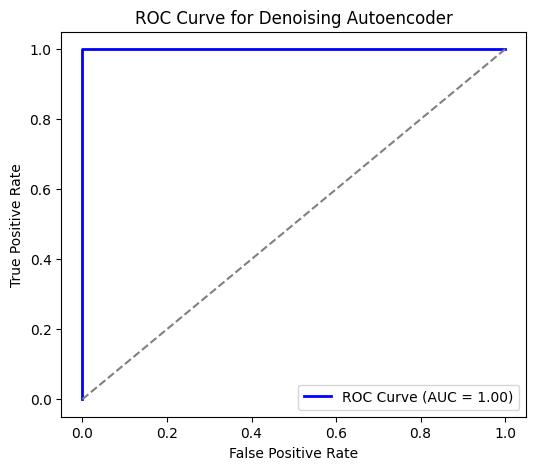

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load MNIST Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Noise to Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


input_dim = 784
encoding_dim = 128

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=l1(1e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

denoising_autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

denoising_autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
history = denoising_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=20, batch_size=256,
                                    validation_data=(x_test_noisy, x_test))
# Get Predictions
reconstructed_imgs = denoising_autoencoder.predict(x_test_noisy)

# Compute Mean Squared Error (MSE)
mse = np.mean(np.square(x_test - reconstructed_imgs))
accuracy = (1 - mse) * 100
print(f"Reconstruction Accuracy: {accuracy:.2f}%")

# Compute Loss
loss = denoising_autoencoder.evaluate(x_test_noisy, x_test)
print(f"Test Loss: {loss:.4f}")


plt.figure(figsize=(12, 5))

# Accuracy Graph (Custom Reconstruction Accuracy)
plt.subplot(1, 2, 1)
plt.plot(100 * (1 - np.array(history.history['loss'])), label="Train Accuracy")
plt.plot(100 * (1 - np.array(history.history['val_loss'])), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Reconstruction Accuracy Over Epochs")
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.show()


from sklearn.metrics import roc_curve, auc

# Compute Pixel-wise Differences (Reconstruction Error)
mse = np.mean(np.square(x_test - reconstructed_imgs), axis=1)

# Create Binary Labels: Normal (Low MSE) vs. Anomaly (High MSE)
threshold = np.percentile(mse, 90)  # Adjust percentile based on anomaly detection needs
y_true = (mse > threshold).astype(int)  # 1 for Anomaly, 0 for Normal

# ROC Curve Computation
fpr, tpr, _ = roc_curve(y_true, mse)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Denoising Autoencoder")
plt.legend()
plt.show()




Optimal Threshold (Youden's J): 0.071600

Confusion Matrix:
[[9000    0]
 [   1  999]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9000
     Anomaly       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



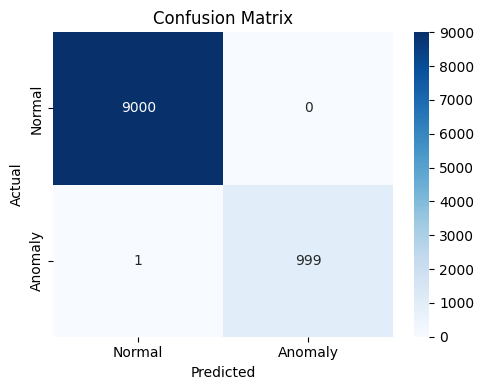

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Sample-wise reconstruction error (do NOT overwrite 'mse')
reconstruction_errors = np.mean(np.square(x_test - reconstructed_imgs), axis=1)

# Create binary ground truth labels using a high percentile as "anomaly"
threshold_initial = np.percentile(reconstruction_errors, 90)
y_true = (reconstruction_errors > threshold_initial).astype(int)  # 1: Anomaly, 0: Normal

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_true, reconstruction_errors)
roc_auc = auc(fpr, tpr)

# Best threshold using Youden's J statistic
j_scores = tpr - fpr
best_idx = np.argmax(j_scores)
best_threshold = thresholds[best_idx]
print(f"\nOptimal Threshold (Youden's J): {best_threshold:.6f}")

# Predict using optimal threshold
y_pred = (reconstruction_errors > best_threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Anomaly"]))


# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal", "Anomaly"],
            yticklabels=["Normal", "Anomaly"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = "/content/drive/MyDrive/archive/train"
valid_dir = "/content/drive/MyDrive/archive/val"
test_dir = "/content/drive/MyDrive/archive/test"

# Image properties
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_generator = datagen.flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode=None, shuffle=True)

valid_generator = datagen.flow_from_directory(
    valid_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode=None, shuffle=False)

test_generator = datagen.flow_from_directory(
    test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode=None, shuffle=False)


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
# Function to add noise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

# Load images from generator
x_train = next(train_generator)
x_valid = next(valid_generator)
x_test = next(test_generator)

# Create noisy images
x_train_noisy = add_noise(x_train)
x_valid_noisy = add_noise(x_valid)
x_test_noisy = add_noise(x_test)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define Autoencoder
input_img = Input(shape=(img_height, img_width, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,731 (194.26 KB)

 Trainable params: 49,731 (194.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20, batch_size=batch_size,
    validation_data=(x_valid_noisy, x_valid),
    callbacks=[early_stopping]
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - loss: 0.6930 - val_loss: 0.6806
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.6811 - val_loss: 0.6681
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - loss: 0.6681 - val_loss: 0.6630
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - loss: 0.6624 - val_loss: 0.6649
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - loss: 0.6657 - val_loss: 0.6623
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - loss: 0.6645 - val_loss: 0.6581
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.6605 - val_loss: 0.6561
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - loss: 0.6578 - val_loss: 0.6564
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.6573 - val_loss: 0.6560
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - loss: 0.6565 - val_loss: 0.6530
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - loss: 0.6538 - val_loss: 0.6484
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - loss: 0.6499 - val_loss: 0.6438
E

In [ ]:
# Save model
autoencoder.save('denoising_autoencoder.h5')

# Evaluate model on test data
test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print(f'Test Loss: {test_loss:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.5954
Test Loss: 0.5954


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


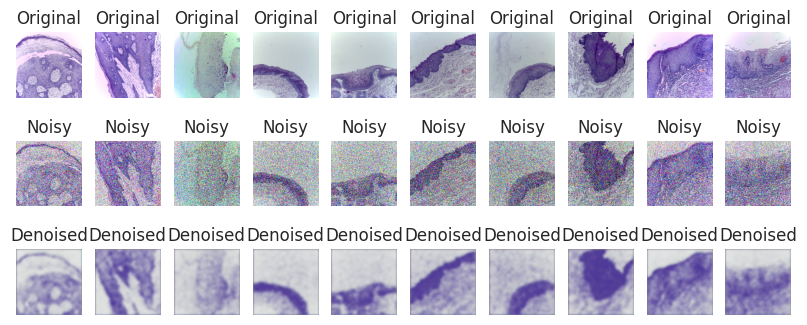

In [ ]:
import matplotlib.pyplot as plt

# Predict on test images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Display Original, Noisy, and Reconstructed Images
n = 10  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title("Original")

    # Noisy
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.axis('off')
    plt.title("Noisy")

    # Reconstructed
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_imgs[i])
    plt.axis('off')
    plt.title("Denoised")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


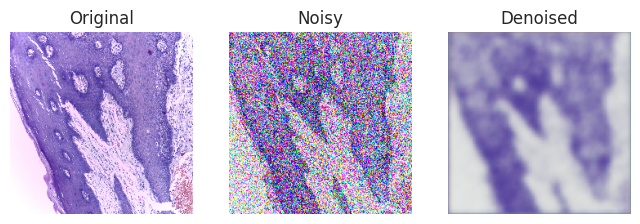

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to test a single image
def predict_single_image(img_path, model):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    noisy_img = add_noise(np.expand_dims(img_array, axis=0))

    denoised_img = model.predict(noisy_img)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img_array)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(noisy_img[0])
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(denoised_img[0])
    plt.title("Denoised")
    plt.axis("off")

    plt.show()

# Test on a sample image from the test dataset
sample_image_path = "/content/drive/MyDrive/archive/test/Normal/Normal_100x_2.jpg"
predict_single_image(sample_image_path, autoencoder)
